In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

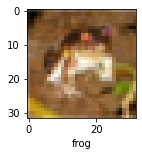

In [ ]:
plot_sample(x_train, y_train, 0)

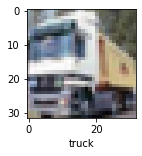

In [ ]:
plot_sample(x_train, y_train, 1)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8111 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6273 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5441 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4826 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4324 - accuracy: 0.4957


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48      1000
           1       0.70      0.47      0.56      1000
           2       0.32      0.41      0.36      1000
           3       0.30      0.51      0.38      1000
           4       0.59      0.13      0.21      1000
           5       0.51      0.24      0.32      1000
           6       0.39      0.75      0.51      1000
           7       0.55      0.54      0.55      1000
           8       0.65      0.58      0.61      1000
           9       0.49      0.67      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.45     10000
weighted avg       0.52      0.47      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.4944 - accuracy: 0.4597
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1325 - accuracy: 0.6023
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0017 - accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9230 - accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8611 - accuracy: 0.6988
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8106 - accuracy: 0.7170
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7631 - accuracy: 0.7362
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7260 - accuracy: 0.7492
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6909 - accuracy: 0.7596
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.65

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9160 - accuracy: 0.6964


[0.91599041223526, 0.696399986743927]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.40687723e-03, 6.46528715e-05, 7.94316118e-04, 8.55292797e-01,
        9.07066569e-05, 1.20394930e-01, 1.09349261e-03, 4.21659615e-06,
        1.98134501e-02, 4.45321602e-05],
       [6.38449506e-04, 4.87430440e-03, 2.32792289e-07, 4.33112568e-08,
        7.15149113e-08, 4.58308458e-09, 1.36920053e-09, 1.48793307e-08,
        9.94373679e-01, 1.13178510e-04],
       [3.66352201e-01, 1.81192219e-01, 9.87568754e-04, 1.22971914e-03,
        5.74022066e-03, 2.25122072e-04, 1.32750720e-04, 1.57762319e-03,
        2.56581575e-01, 1.85980946e-01],
       [5.29829204e-01, 2.00736616e-02, 1.66848656e-02, 7.84665626e-03,
        7.48339072e-02, 1.27191801e-04, 2.12098472e-04, 4.12039552e-03,
        3.46016079e-01, 2.55893538e-04],
       [1.34250200e-07, 1.13606465e-03, 1.26709770e-02, 3.65943946e-02,
        5.28035045e-01, 1.77200243e-03, 4.19667840e-01, 1.60044931e-06,
        1.18975004e-04, 2.91276046e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

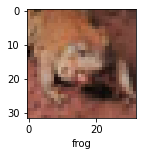

In [ ]:
plot_sample(x_test, y_test,5)

In [ ]:
classes[y_classes[5]]

'frog'